# Borrower's APR and Features  of the loans 
## by Yahia Ali 

## Investigation Overview

>   Study the features that maybe affect Borrower's APR.


## Dataset Overview

> This data set contains 81 variables about loan (Loan Status, Borrower Rate, borrower income ...etc) and has 113,937 row as loans data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe


df = pd.read_csv('prosperLoanData.csv')
df.drop_duplicates()
df.drop(['ListingKey','ListingNumber','ClosedDate','CreditGrade','GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled',
            'OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
            'ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber'
            ],inplace=True, axis=1)
df.dropna(inplace=True)

ordinal = {'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A', 'AA'],
                    'EmploymentStatus' : [ 'Not employed', 'Other', 'Retired', 'Self-employed', 'Part-time','Full-time', 'Employed']
                    }
for i in ordinal:
    orderedvar = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal[i])
    df[i] = df[i].astype(orderedvar)



## Income Distribution
> It appears that the monthly income distribution is a right-skewed distribution with about mean 5000. There are a lot of outliers according to the boxplot which needs more investigating.

## Income Distribution

* It appears that the monthly income distribution is a right-skewed distribution with about mean 5000. There are a lot of outliers according to the boxplot which needs more investigating.
* we fix that by remove the highst 2.5% (income > 15000)

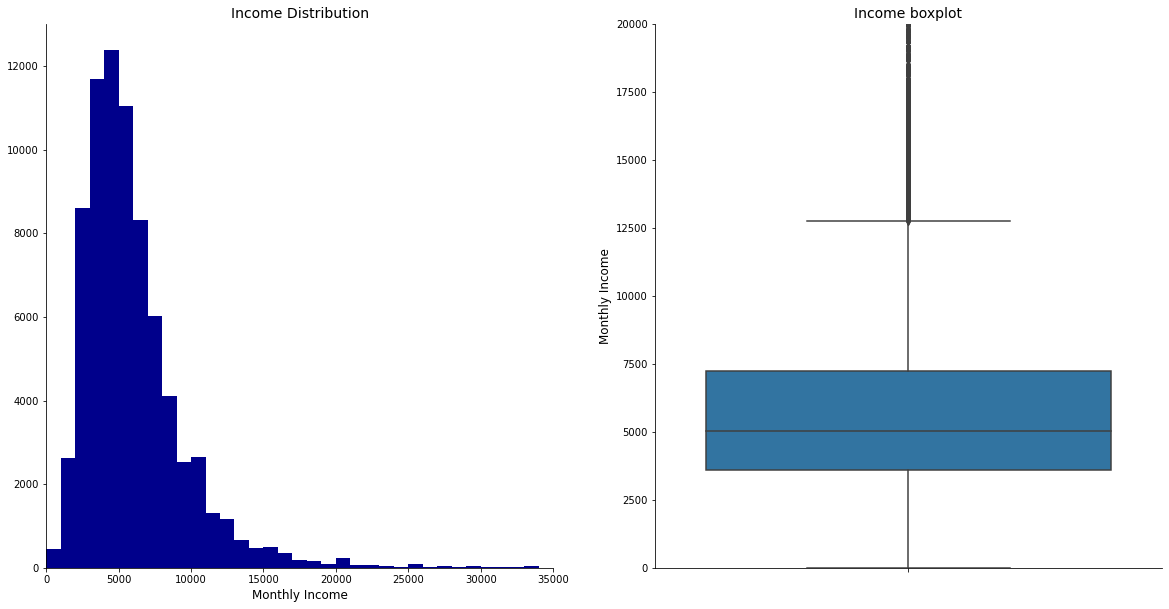

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
bins = np.arange(0, df.StatedMonthlyIncome.max(), 1000)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins, color='darkblue');
plt.xlim(0, 35000);
plt.title('Income Distribution', fontsize=14)
plt.xlabel('Monthly Income', fontsize=12)

plt.subplot(1,2,2)
sb.boxplot(data=df, y='StatedMonthlyIncome');
plt.title('Income boxplot', fontsize=14)
plt.ylim(0, 20000)
plt.ylabel('Monthly Income', fontsize=12);
sb.despine()

0.0


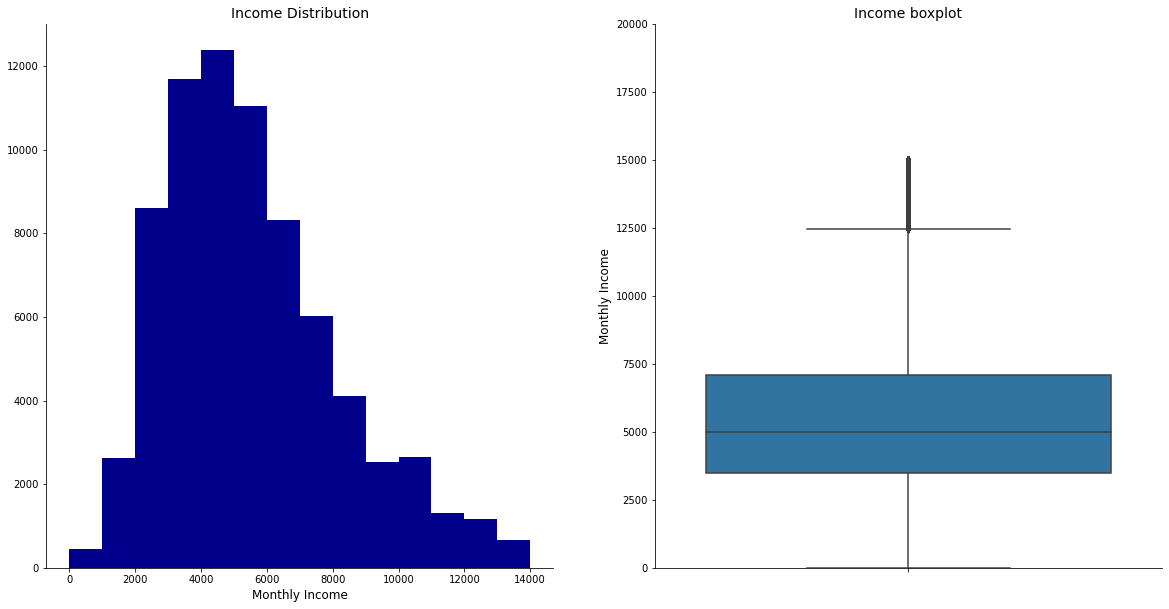

In [6]:
# Reduce outliers of Monthly Income
# tried 20000 , 17500 and 15000
print(100*df[df['StatedMonthlyIncome']>15000].shape[0] / df.shape[0])
df = df[df['StatedMonthlyIncome']<=15000]
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
bins = np.arange(0, df.StatedMonthlyIncome.max(), 1000)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins, color='darkblue');
#plt.xlim(0, 35000);
plt.title('Income Distribution', fontsize=14)
plt.xlabel('Monthly Income', fontsize=12)

plt.subplot(1,2,2)
sb.boxplot(data=df, y='StatedMonthlyIncome');
plt.title('Income boxplot', fontsize=14)
plt.ylim(0, 20000)
plt.ylabel('Monthly Income', fontsize=12);
sb.despine()

## Borrower APR Distribution

> we explore Borrower APR found that APR is more close to a unimodal distribution with mean around 0.2.

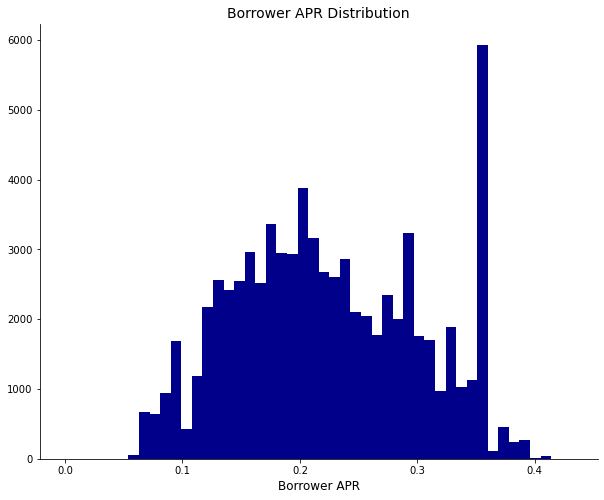

In [7]:
plt.figure(figsize=(10, 8))
bins = np.arange(0, df.BorrowerAPR.max()+0.01, 0.009)
plt.hist(data=df, x='BorrowerAPR', bins=bins, color='darkblue');
plt.title('Borrower APR Distribution', fontsize=14)
plt.xlabel('Borrower APR', fontsize=12);
sb.despine()

## relation between APR and (Monthly Income and Loan Amount) 

* there exists a negative relationship between APR and LoanAmount. 
* there is a weak negative relation between monthly income and the APR



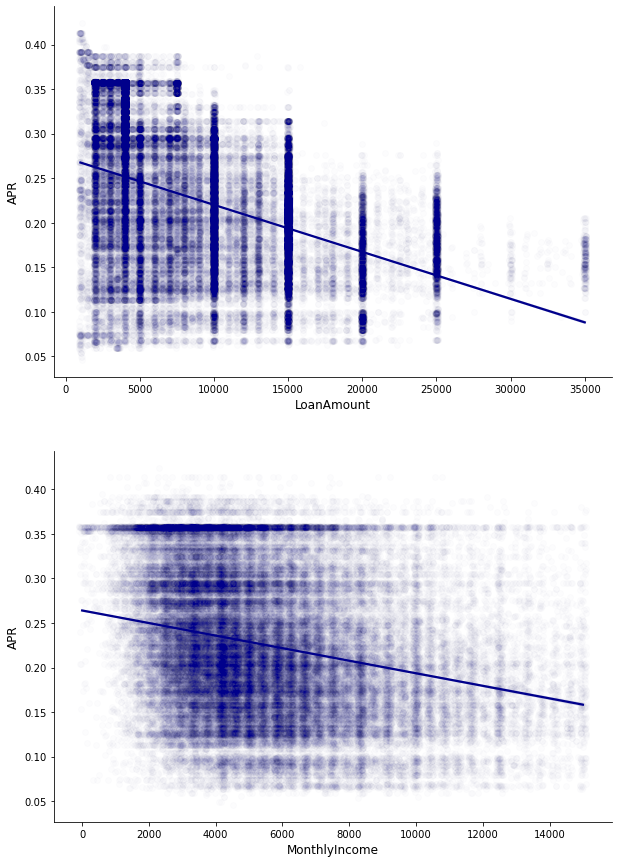

In [9]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sb.regplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR', color='darkblue', x_jitter=100,
          scatter_kws={'alpha':0.01}, fit_reg=True)
plt.xlabel('LoanAmount', fontsize=12)
plt.ylabel('APR', fontsize=12);

plt.subplot(2,1,2)
sb.regplot(data=df, x='StatedMonthlyIncome', y='BorrowerAPR', color='darkblue', x_jitter=100,
          scatter_kws={'alpha':0.01}, fit_reg=True)
plt.xlabel('MonthlyIncome', fontsize=12)
plt.ylabel('APR', fontsize=12);
sb.despine()

## APR vs LoanOriginalAmount for each Prosper Rating

* The Negative relation between the APR and loanAmount turns to be slightly positive in high ratings!


<Figure size 720x720 with 0 Axes>

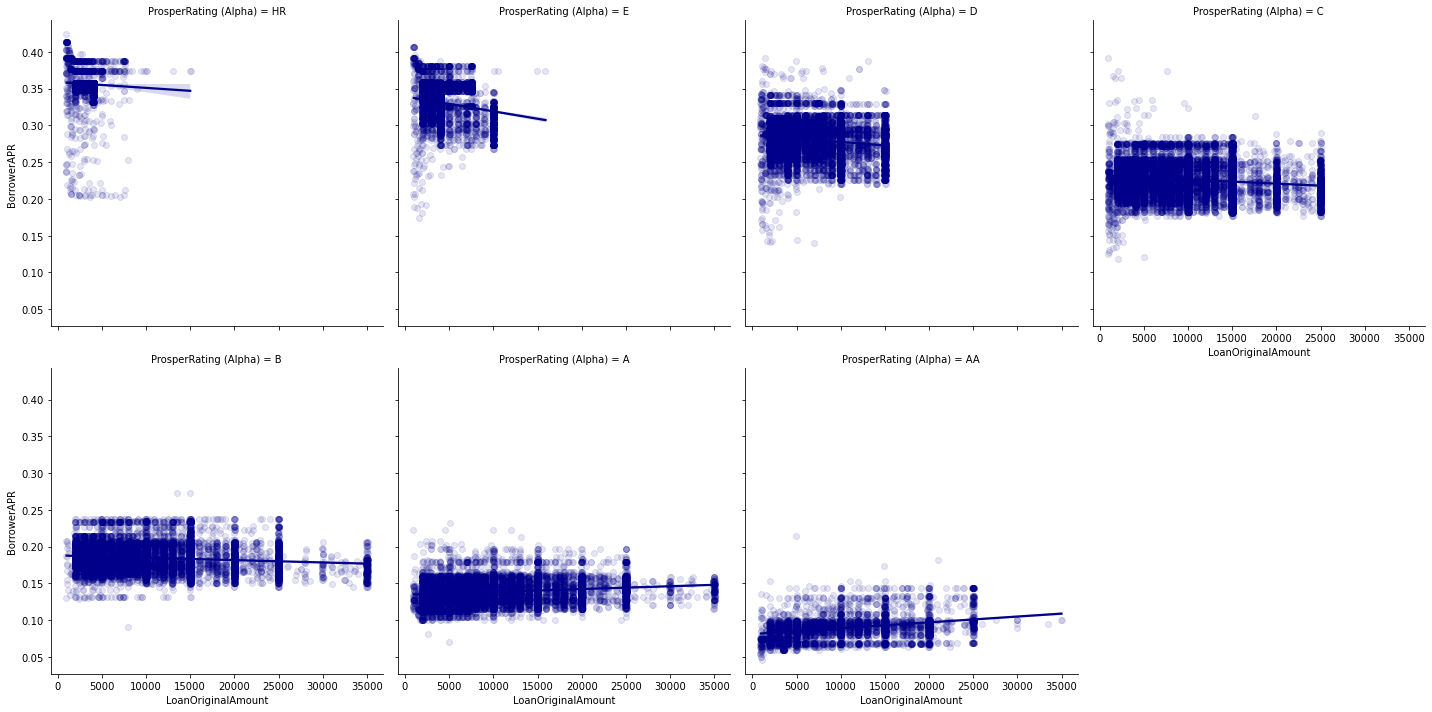

In [10]:
plt.figure(figsize=(10,10))
g=sb.FacetGrid(data=df, col='ProsperRating (Alpha)', col_wrap=4, height=5, aspect=1)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color='darkblue', x_jitter=100, scatter_kws={'alpha':0.1});

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle